In [1]:
#Titanic survived Project
# basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# sklearn libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_features = data.columns
print(data_features)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
allowed_feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

df = data[allowed_feats]

In [9]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [10]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [12]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [13]:
for i in allowed_feats: 
    print(f'{i} has {len(df[i].value_counts())} values.')

Pclass has 3 values.
Sex has 2 values.
Age has 88 values.
SibSp has 7 values.
Parch has 7 values.
Fare has 248 values.
Survived has 2 values.


In [14]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

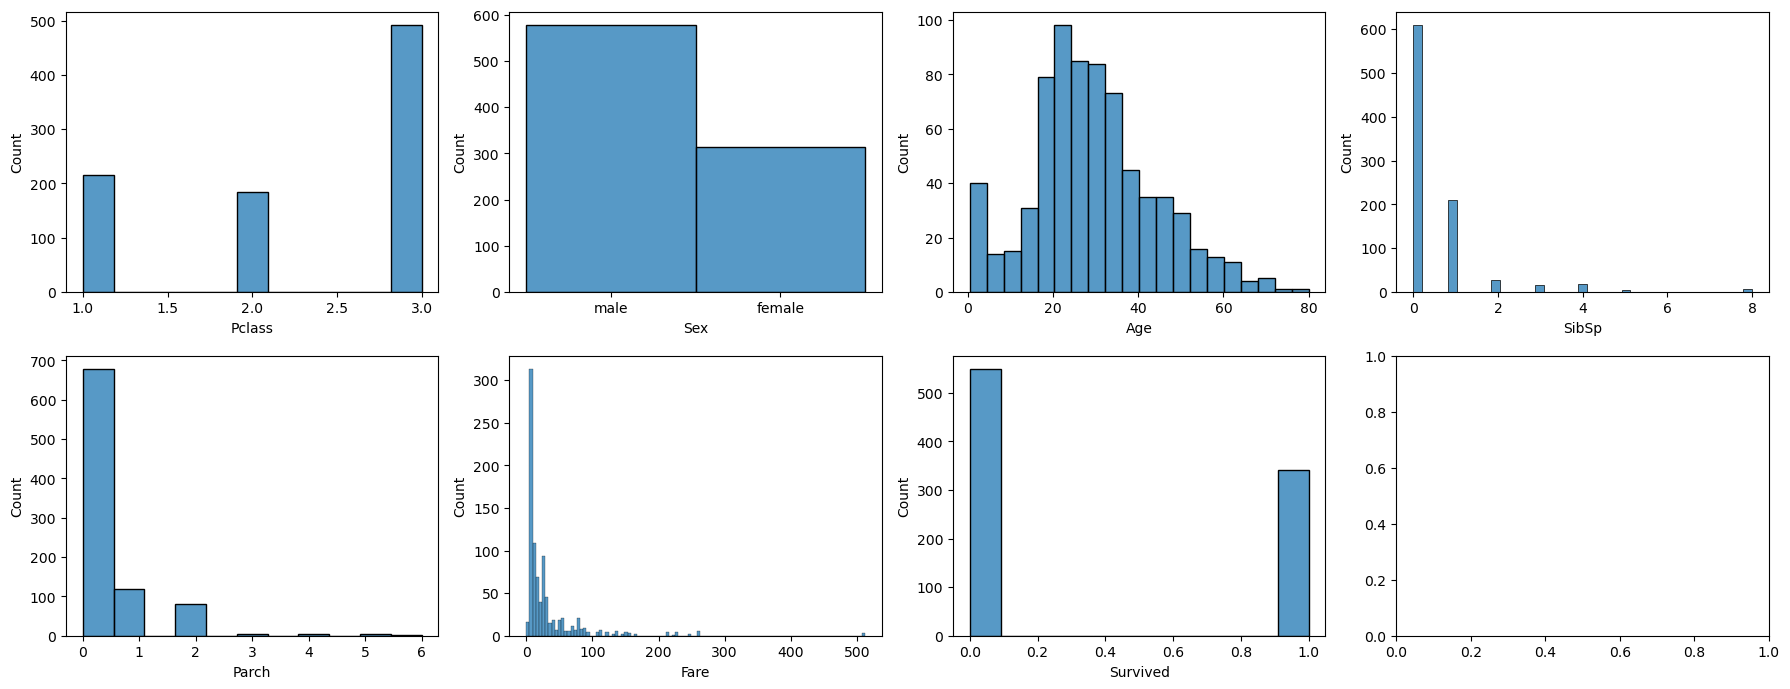

In [16]:
fig, axes = plt.subplots(2,4, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3],
      [1,0], [1,1], [1,2], [1,3]]

for i in range(len(allowed_feats)): 
    j = s1[i][0]
    k = s1[i][1]
    #print(j,k)
    sns.histplot(data = df, x = allowed_feats[i], ax = axes[j,k])
    #bos_df[feat[i]].hist(bins = 10, ax = axes[j,k])
    axes[j,k].set_xlabel(allowed_feats[i])
    
    
plt.show()  

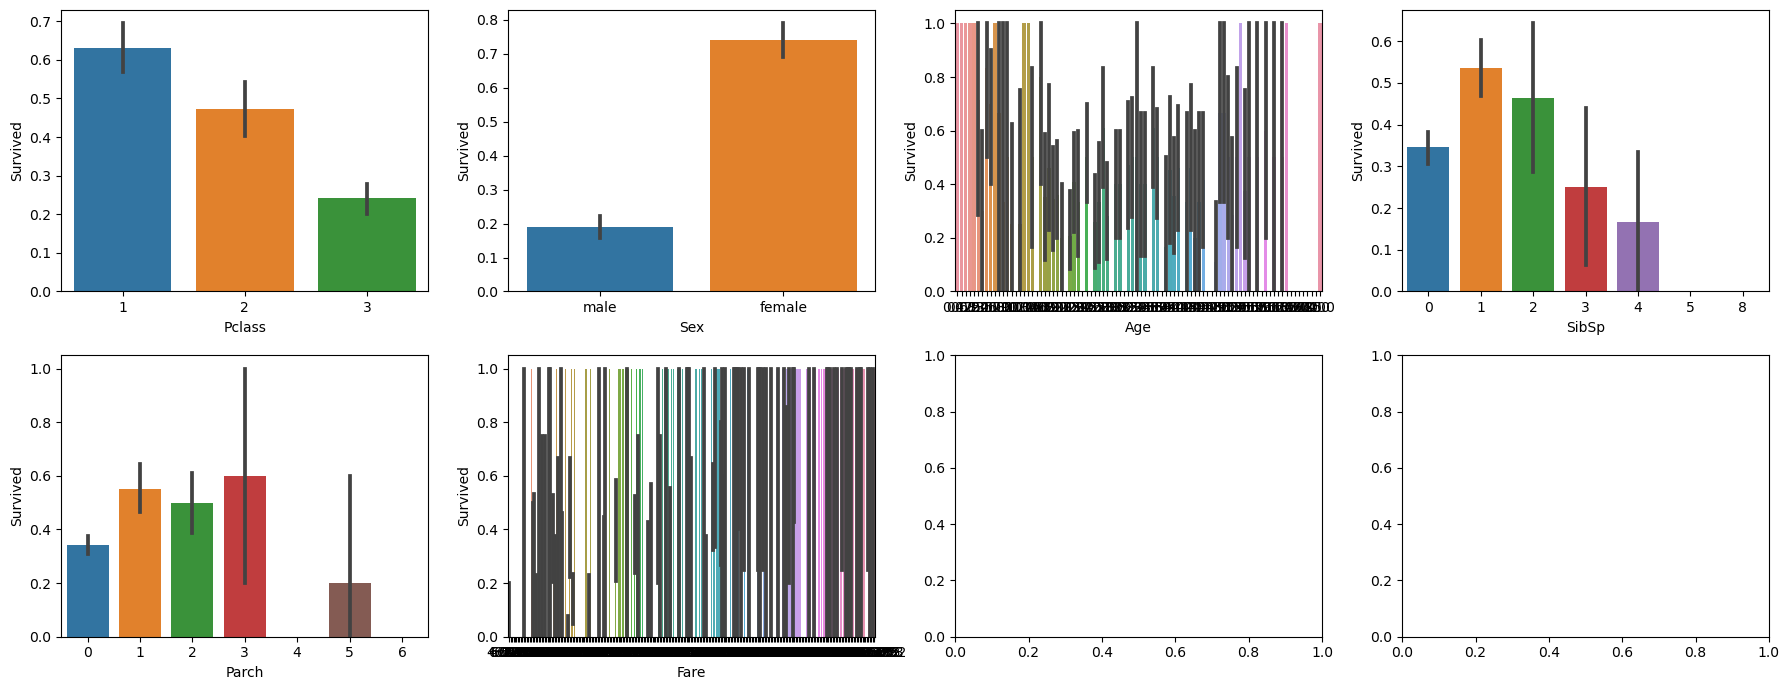

In [17]:
fig, axes = plt.subplots(2,4, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3],
      [1,0], [1,1], [1,2], [1,3]]

for i in range(len(allowed_feats)-1): 
    j = s1[i][0]
    k = s1[i][1]
    #print(j,k)
    sns.barplot(data = df, x = allowed_feats[i], y = df['Survived'], ax = axes[j,k])
    #bos_df[feat[i]].hist(bins = 10, ax = axes[j,k])
    axes[j,k].set_xlabel(allowed_feats[i])
    
    
plt.show() 

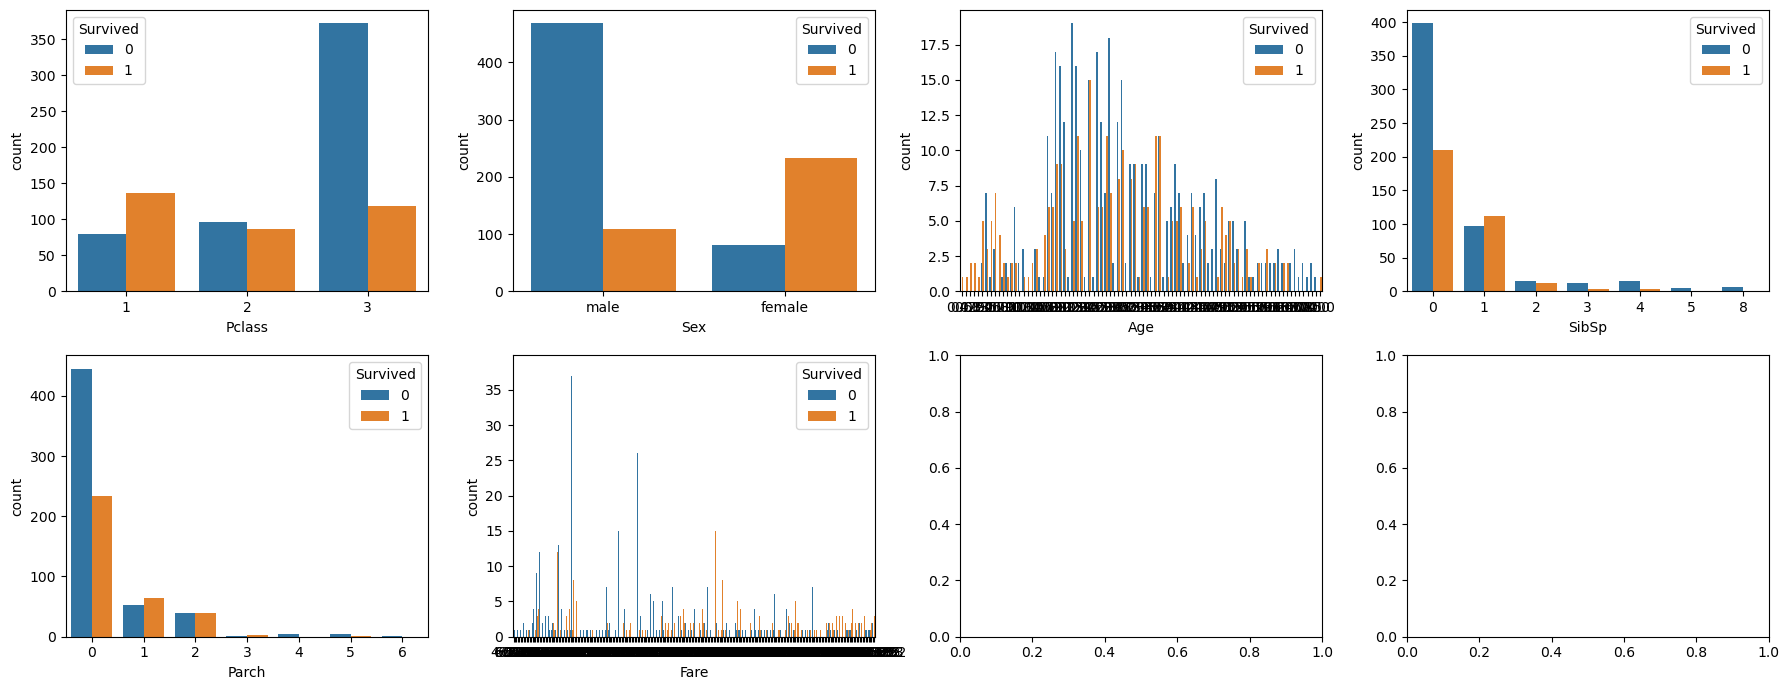

In [18]:
fig, axes = plt.subplots(2,4, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3],
      [1,0], [1,1], [1,2], [1,3]]

for i in range(len(allowed_feats)-1): 
    j = s1[i][0]
    k = s1[i][1]
    #print(j,k)
    sns.countplot(data = df, x = allowed_feats[i], hue = df['Survived'],ax = axes[j,k])
    #bos_df[feat[i]].hist(bins = 10, ax = axes[j,k])
    axes[j,k].set_xlabel(allowed_feats[i])
    
    
plt.show()   

In [19]:
df_male = df[df['Sex']=='male']
df_female = df[df['Sex']== 'female']

In [20]:
df_male.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
4,3,male,35.0,0,0,8.0500,0
5,3,male,NaN,0,0,8.4583,0
6,1,male,54.0,0,0,51.8625,0
7,3,male,2.0,3,1,21.0750,0


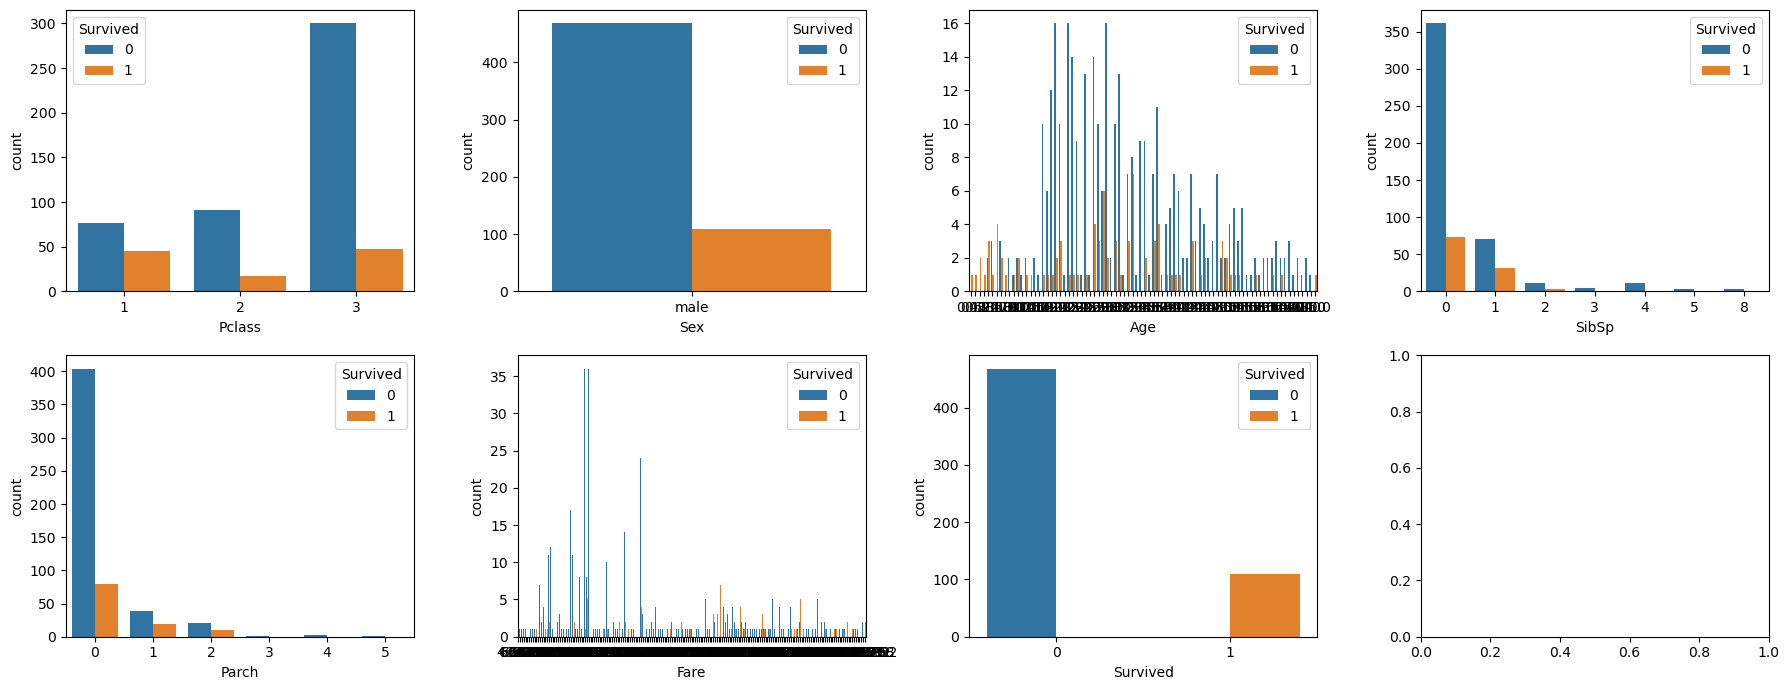

In [21]:
fig, axes = plt.subplots(2,4, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3],
      [1,0], [1,1], [1,2], [1,3]]

for i in range(len(df_male.columns)): 
    j = s1[i][0]
    k = s1[i][1]
    #print(j,k)
    sns.countplot(data = df_male, x = df_male.columns[i], hue = df_male['Survived'],ax = axes[j,k])
    #bos_df[feat[i]].hist(bins = 10, ax = axes[j,k])
    axes[j,k].set_xlabel(df_male.columns[i])
    
    
plt.show()  

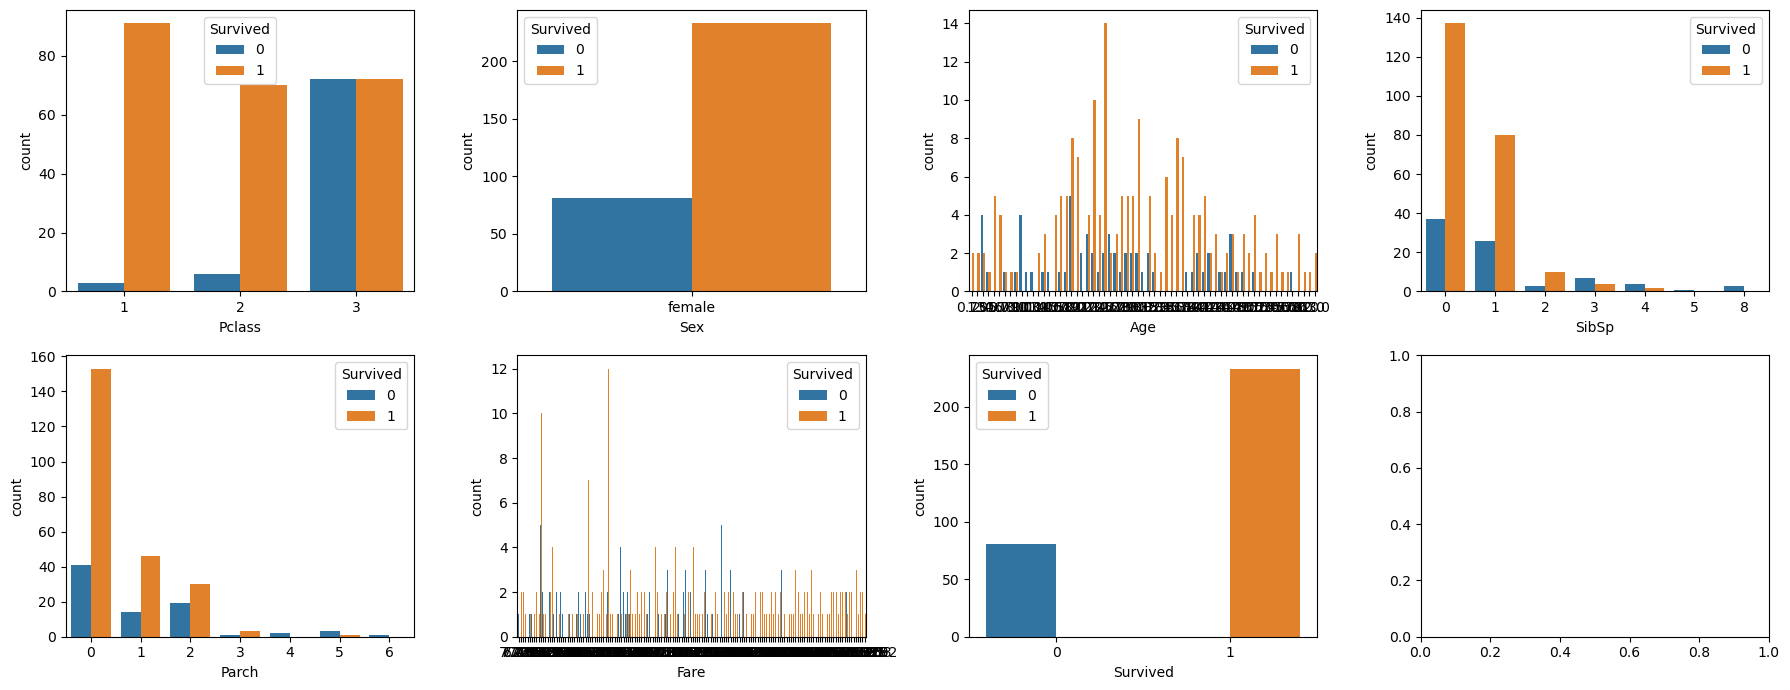

In [22]:
fig, axes = plt.subplots(2,4, figsize=(18,7), tight_layout = True)

s1 = [[0,0], [0,1], [0,2], [0,3],
      [1,0], [1,1], [1,2], [1,3]]

for i in range(len(df_female.columns)): 
    j = s1[i][0]
    k = s1[i][1]
    #print(j,k)
    sns.countplot(data = df_female, x = df_female.columns[i], hue = df_female['Survived'],ax = axes[j,k])
    #bos_df[feat[i]].hist(bins = 10, ax = axes[j,k])
    axes[j,k].set_xlabel(df_female.columns[i])
    
    
plt.show()  

In [23]:
cat_feats = ["Pclass", "Sex", "SibSp", "Parch"]
num_feats = ["Age", "Fare"]

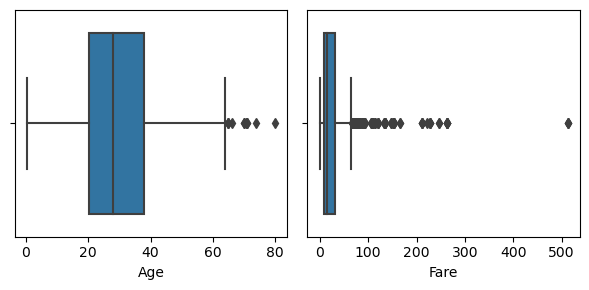

In [24]:
# checking outliers for numerical features: 

fig, axes = plt.subplots(1,2, figsize=(6,3), tight_layout = True)

#s1 = [[0,0], [0,1]]

for i in range(len(num_feats)): 
    #j = s1[i][0]
    #k = s1[i][1]
    sns.boxplot(data = df, x = df[num_feats[i]], ax = axes[i])
    axes[i].set_xlabel(num_feats[i])
    
    
plt.show() 

<Axes: >

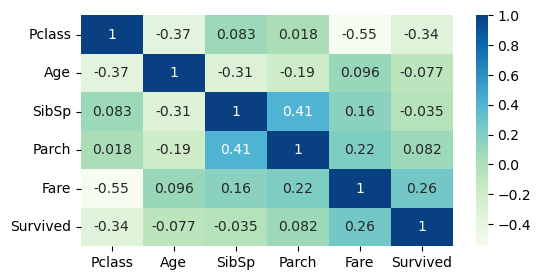

In [25]:
df1 = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

fig, axes = plt.subplots(figsize = (6,3))
sns.heatmap(df1.corr(), cmap = 'GnBu',annot=True)

In [26]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [28]:
#Data Transformations :
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:
# pipeline 

num_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), 
           ('scaler', RobustScaler())
        ]
    )

cat_pipeline=Pipeline(
    steps=[('imputer',SimpleImputer(strategy='most_frequent')),
           ('onehotencoder', OneHotEncoder()),
           ('scaler',StandardScaler(with_mean=False))
        ]
    )

# preprocessor 

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_feats), 
    ('cat_pipeline', cat_pipeline, cat_feats)
    ])

In [30]:
num_feats

['Age', 'Fare']

In [31]:
#Train Test Split :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(f'X train shape : {X_train.shape}, y train shape : {y_train.shape}')
print(f'X test shape : {X_test.shape}, y test shape : {y_test.shape}')

X train shape : (623, 6), y train shape : (623,)
X test shape : (268, 6), y test shape : (268,)


In [33]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
445,1,male,4.0,0,2,81.8583
650,3,male,NaN,0,0,7.8958
172,3,female,1.0,1,1,11.1333
450,2,male,36.0,1,2,27.7500
314,2,male,43.0,1,1,26.2500


In [34]:
X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train).toarray(), columns=preprocessor.get_feature_names_out())
X_test_scaled = pd.DataFrame(preprocessor.transform(X_test).toarray(), columns=preprocessor.get_feature_names_out())

In [35]:
X_train_scaled.head()

,num_pipeline__Age,num_pipeline__Fare,cat_pipeline__Pclass_1,cat_pipeline__Pclass_2,cat_pipeline__Pclass_3,cat_pipeline__Sex_female,cat_pipeline__Sex_male,cat_pipeline__SibSp_0,cat_pipeline__SibSp_1,cat_pipeline__SibSp_2,...,cat_pipeline__SibSp_4,cat_pipeline__SibSp_5,cat_pipeline__SibSp_8,cat_pipeline__Parch_0,cat_pipeline__Parch_1,cat_pipeline__Parch_2,cat_pipeline__Parch_3,cat_pipeline__Parch_4,cat_pipeline__Parch_5,cat_pipeline__Parch_6
0,-1.846154,2.953082,2.401917,0.000000,0.000000,0.000000,2.108173,2.128252,0.00000,0.0,...,0.0,0.0,0.0,0.00000,0.000000,3.468506,0.0,0.0,0.0,0.0
1,0.000000,-0.287334,0.000000,0.000000,2.017122,0.000000,2.108173,2.128252,0.00000,0.0,...,0.0,0.0,0.0,2.32839,0.000000,0.000000,0.0,0.0,0.0,0.0
2,-2.076923,-0.145494,0.000000,0.000000,2.017122,2.108173,0.000000,0.000000,2.35519,0.0,...,0.0,0.0,0.0,0.00000,2.913315,0.000000,0.0,0.0,0.0,0.0
3,0.615385,0.582510,0.000000,2.447149,0.000000,0.000000,2.108173,0.000000,2.35519,0.0,...,0.0,0.0,0.0,0.00000,0.000000,3.468506,0.0,0.0,0.0,0.0
4,1.153846,0.516793,0.000000,2.447149,0.000000,0.000000,2.108173,0.000000,2.35519,0.0,...,0.0,0.0,0.0,0.00000,2.913315,0.000000,0.0,0.0,0.0,0.0


In [36]:
#Model Building :
#According to the task we have to use only Decision Trees for the prediction
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
prediction = model.predict(X_test_scaled)

print(f'Accuracy Score : {accuracy_score(y_test, prediction)}')
print(f'Classification Report : {classification_report(y_test, prediction)}')

Accuracy Score : 0.75
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.80      0.79       157
           1       0.71      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [37]:
#Finding the best Parameters :
from sklearn.model_selection import GridSearchCV

In [38]:
Model_dt = DecisionTreeClassifier()

In [39]:
param_grid_dt = [
    {
        'criterion': ['gini', 'entropy'], 
        'max_depth': [2, 3, 4, 5, 6],
    }
]

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=10, scoring='accuracy')

In [40]:
grid_search_dt.fit(X_train_scaled, y_train)
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.818637992831541


In [41]:
clf_best = grid_search_dt.best_estimator_

In [42]:
clf_best

DecisionTreeClassifier(max_depth=3)

In [48]:
y_pred = clf_best.predict(X_test_scaled)

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

Accuracy Score : 0.8097014925373134


In [51]:
# Let us get another prediction : 

data2 = pd.DataFrame({
    'Pclass' : [1],
    'Sex' : ['female'],
    'Age' : [70], 
    'SibSp' : [1],
    'Parch' : [0], 
    'Fare' : [54.0]
})

print(data2)

   Pclass     Sex  Age  SibSp  Parch  Fare
0       1  female   70      1      0  54.0


In [52]:
import sklearn
sklearn.__version__

'1.2.1'